# 数据集2: GitHub Dataset
 1. 数据摘要
    1.1属性
+ `name` 仓库的名称
+ `stars_count` 仓库的star数量
+ `forks_count` 仓库的fork数量
+ `watchers` 仓库当前有多少观看者
+ `pull_requests` 拉取该仓库的请求数量
+ `primary_language` 仓库主要使用的编程语言
+ `languages_used` 该仓库所有使用过的编程语言的列表
+ `commit_count` 该仓库的提交记录数量
+ `create_at` 仓库创建的时间和日期
+ ` license` 这个仓库使用的证书

In [1]:
import pandas as pd
github=pd.read_csv('dataset/repository_data.csv')
github.columns.tolist()

['name',
 'stars_count',
 'forks_count',
 'watchers',
 'pull_requests',
 'primary_language',
 'languages_used',
 'commit_count',
 'created_at',
 'licence']

   1.2 标称属性可能取值的频数
+ `name` 仓库的名称

In [4]:
github['name'].value_counts()

name
dotfiles                                 5590
blog                                     2038
docs                                     1350
website                                  1163
scripts                                   649
                                         ... 
markdown-to-presentation                    1
moodle-client                               1
event-sourcing-graph                        1
react-native-100-Demos                      1
MSI-Z690-Carbon-i7-12700KF-Hackintosh       1
Name: count, Length: 2410862, dtype: int64

+ `primary_language` 主要使用的编程语言

In [5]:
github['primary_language'].value_counts()

primary_language
JavaScript              451954
Python                  451473
Java                    202394
C++                     150066
PHP                     116058
                         ...  
LoomScript                   1
Ragel in Ruby Host           1
Edje Data Collection         1
Sieve                        1
Ox                           1
Name: count, Length: 497, dtype: int64

+ `languages_used` 使用过的所有语言列表

In [3]:
github['languages_used'].value_counts()

languages_used
['Python']                                                        257679
['JavaScript']                                                    157741
['Java']                                                          117624
['C#']                                                             60299
['PHP']                                                            56333
                                                                   ...  
['Svelte', 'TypeScript', 'JavaScript', 'HTML', 'CSS', 'Rust']          1
['Dockerfile', 'Shell', 'JavaScript', 'PowerShell']                    1
['TypeScript', 'HTML', 'Vue', 'JavaScript', 'Python', 'Shell']         1
['C++', 'C', 'Pascal', 'Batchfile', 'GDB']                             1
['HTML', 'C++', 'TypeScript', 'JavaScript']                            1
Name: count, Length: 328148, dtype: int64

+ `licence` 选择的开源协议

In [2]:
github['licence'].value_counts()

licence
MIT License                                                   784251
Apache License 2.0                                            210698
Other                                                         167987
GNU General Public License v3.0                               159443
BSD 3-Clause "New" or "Revised" License                        47078
GNU General Public License v2.0                                43297
GNU Affero General Public License v3.0                         21554
BSD 2-Clause "Simplified" License                              16819
The Unlicense                                                  14400
GNU Lesser General Public License v3.0                         14002
Mozilla Public License 2.0                                     10668
Creative Commons Zero v1.0 Universal                           10353
ISC License                                                     8232
GNU Lesser General Public License v2.1                          6168
Eclipse Public License 1.0

1.3 数值属性的五数概括
    缺失值的个数统计

In [6]:
missing_values=github.isnull().sum()
missing_values=pd.DataFrame(missing_values,columns=['missing_values']).T
missing_values=missing_values.loc[:,(missing_values!=0).any(axis=0)]
missing_values

,name,primary_language,languages_used,commit_count,licence
missing_values,13,218573,221984,1921,1378200


+ `stars_count` 仓库获得的星星
`stars_count` 属性的五数概括

In [11]:
num_stars_count = pd.to_numeric(github['stars_count'].dropna())
num_stars_count.describe()[3:]

min         2.0
25%         7.0
50%        12.0
75%        30.0
max    359805.0
Name: stars_count, dtype: float64

+ `forks_count` 仓库的分支数量

In [13]:
num_forks_count = pd.to_numeric(github['forks_count'].dropna())
num_forks_count.describe()[3:]

min         0.0
25%         1.0
50%         4.0
75%        11.0
max    242208.0
Name: forks_count, dtype: float64

+ `watchers` 查看者数量

In [12]:
num_watchers = pd.to_numeric(github['watchers'].dropna())
num_watchers.describe()[3:]

min       0.0
25%       2.0
50%       3.0
75%       6.0
max    9544.0
Name: watchers, dtype: float64

+ `pull_requests` 拉取请求数

In [15]:
num_pull_requests = pd.to_numeric(github['pull_requests'].dropna())
num_pull_requests.describe()[3:]

min         0.0
25%         0.0
50%         1.0
75%         6.0
max    301585.0
Name: pull_requests, dtype: float64

+`commit_count`提交次数

In [ ]:
num_commit_count = pd.to_numeric(github['commit_count'].dropna())
num_commit_count.describe()[3:]

+ `created_at` 创建时间(年)

In [ ]:
year_counts = pd.to_datetime(github['created_at']).dt.year
year_counts.describe()[3:]

# 2.数据可视化
    2.1 主要使用的编程语言

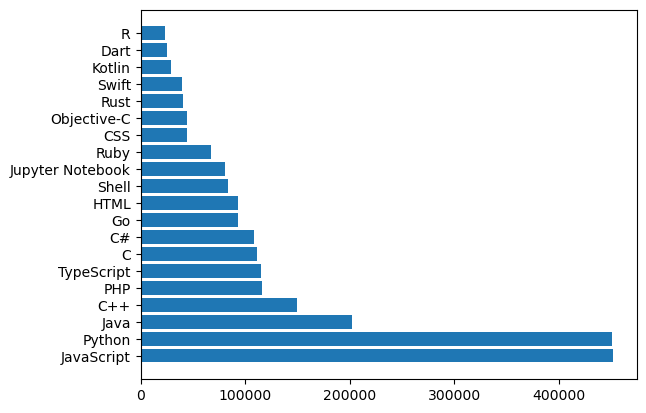

In [25]:
import matplotlib.pyplot as plt
category_counts = github['primary_language'].value_counts().sort_values(ascending=False)[:20]
plt.barh(category_counts.index,category_counts.values)
plt.show()

    2.2 仓库创建时间 属性的直方图

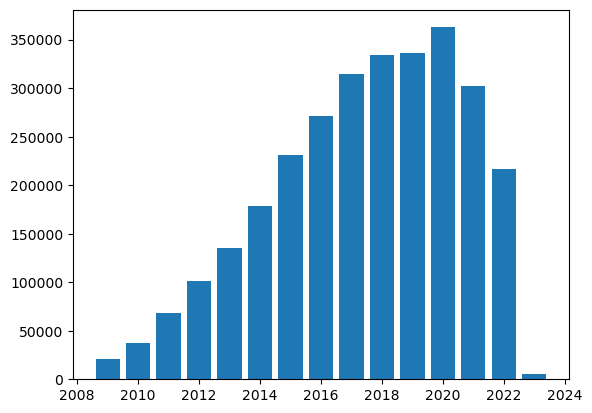

In [31]:
year_counts=year_counts.value_counts()
plt.bar(year_counts.index,year_counts.values)
plt.show()

2.7 仓库各项数值属性

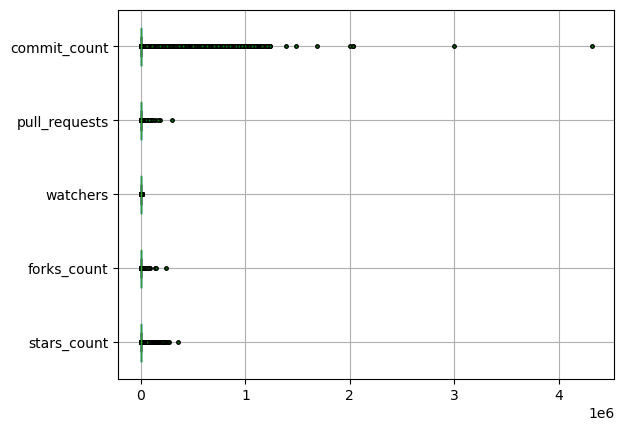

In [32]:
github_num = github[['stars_count','forks_count','watchers','pull_requests','commit_count']].dropna()
github_num.boxplot(flierprops={'marker': '.', 'markerfacecolor': 'green', 'markersize': 5, 'linestyle': 'none'},whis=(5,95),vert=False)
plt.show()

异常值过多,取消异常值

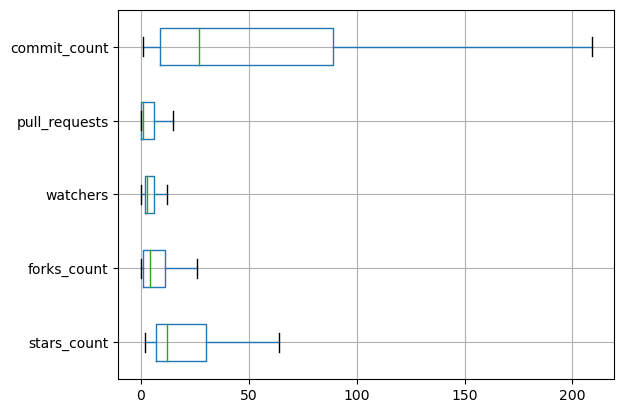

In [33]:
github_num.boxplot(showfliers=False,vert=False)
plt.show()

3. 缺失值处理
3.1 剔除缺失部分

In [35]:
print(github.shape)
github_df_cleaned = github.dropna()
print(github_df_cleaned.shape)

(2917951, 10)
(1471611, 10)


3.2 用最高频率值来填补缺失值

In [36]:
github_cleaned = github.copy()
replace_values = missing_values.copy().rename(index={'missing_values':'replace_values'})
for col in replace_values.columns:
    if missing_values.loc['missing_values',col] == 0:
        continue
    mode = github[col].mode()[0]
    github_df_cleaned[col].fillna(mode,inplace=True)
    replace_values.loc['replace_values',col] = mode
replace_values

C:\Users\3647\AppData\Local\Temp\ipykernel_16656\754578149.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  github_df_cleaned[col].fillna(mode,inplace=True)


,name,primary_language,languages_used,commit_count,licence
replace_values,dotfiles,JavaScript,['Python'],2,MIT License


 3.3 通过属性的相关关系填补缺失值
虽然主要使用语言属性和仓库使用语言列表有相关关系,但是本数据集中往往同时为NaN,无法填补


3.3 用数据对象之间的相似性填补缺失值

In [42]:
import numpy as np
from sklearn.metrics.pairwise import nan_euclidean_distances
import pandas as pd
from tqdm import tqdm

github = pd.read_csv('dataset/github_dataset.csv')

rows_with_missing = github[github.isnull().any(axis=1)]
numeric_rows_with = rows_with_missing[['stars_count','forks_count','issues_count','pull_requests','contributors']]
rows_without_missing = github[~github.isnull().any(axis=1)]
numeric_rows_without = rows_without_missing[['stars_count','forks_count','issues_count','pull_requests','contributors']]
interpoted = rows_with_missing.copy()
for row in numeric_rows_with.itertuples():
    # 计算当前行与其他行的欧氏距离，忽略NaN值
    distances = nan_euclidean_distances([numeric_rows_with.loc[row.Index]], numeric_rows_without)[0]
    nearest_row_index = np.argmin(distances)
    nearest_row = rows_without_missing.iloc[nearest_row_index]
    # 使用最近邻行的值填充缺失值
    interpoted.loc[row.Index] = nearest_row
interpoted

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,ethereum/aleth,0,0,313,27,154,C++
1,ethereum/aleth,0,0,313,27,154,C++
10,iamrajiv/new-keptn-docs-engine,0,1,81,3,0,JavaScript
30,donnemartin/system-design-primer,0,0,164,164,115,Python
37,thrau/jarchivelib,183,33,23,4,7,Java
...,...,...,...,...,...,...,...
1014,SauravMukherjee44/Portfolio-Saurav-Mukherjee,37,18,1,0,2,CSS
1015,sirinath/blog,0,0,2,0,23,Shell
1019,mrdbourke/food-not-food,45,9,1,0,2,Jupyter Notebook
1032,lynxerzhang/AS3Util,3,1,1,0,0,ActionScript
